# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains:
https://sites.google.com/site/timeserieschain/

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

## Penguin Short (from MP VII) ##
Telemetry collected from a Magellanic penguin. The full data consists of 1,048,575 data points recorded at 40 Hz (about 7.2 hours). We focus on the X-Axis acceleration (the direction of travel for a swimming bird). 

m = 28 (~0.7 s) (MP VII)

m = 25 (Robust Time Series Chain Discovery with Incremental Nearest Neighbors)

m = 20 (own research, interesting results!)

In [2]:
# Parameter
use_case = "chains"
data_name = "penguinshort"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "penguinshort")

### Experiments ###

In [3]:
# Hyperparameter
target_w = 20
dilation_sizes = utils.calculate_dilation_sizes(target_w)

print("Dilation Sizes:", dilation_sizes)

Dilation Sizes: [1, 2, 3, 4]


In [4]:
# calculate
calculate.chains(T, dilation_sizes, target_w, data_name, use_case)

Calculated MP for: w=20, m=20, d=1


/vol/fob-vol3/mi20/hirschmi/.conda/envs/masterthesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/vol/fob-vol3/mi20/hirschmi/.conda/envs/masterthesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/vol/fob-vol3/mi20/hirschmi/.conda/envs/masterthesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Calculated MP for: w=21, m=11, d=2
Calculated MP for: w=19, m=7, d=3
Calculated MP for: w=21, m=6, d=4


/vol/fob-vol3/mi20/hirschmi/.conda/envs/masterthesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/vol/fob-vol3/mi20/hirschmi/.conda/envs/masterthesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/vol/fob-vol3/mi20/hirschmi/.conda/envs/masterthesis/lib/python3.10/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


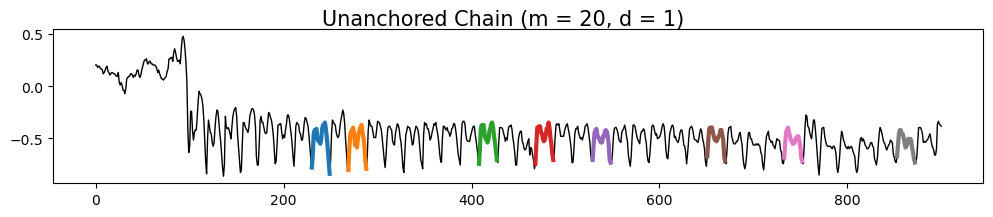

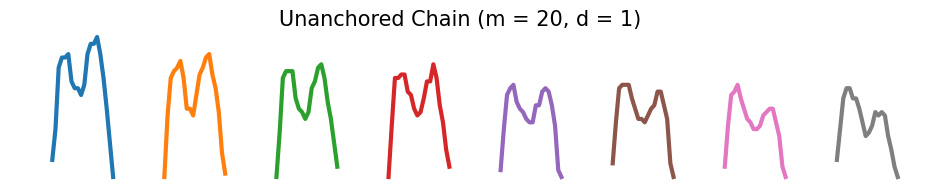

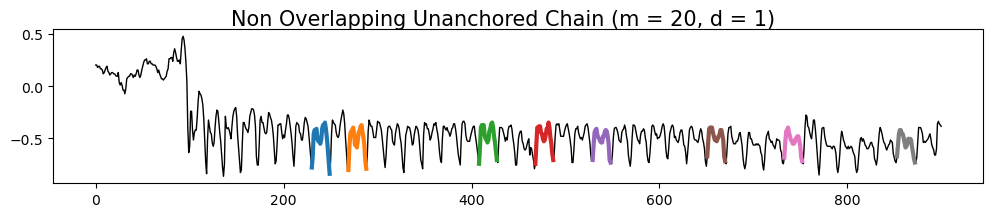

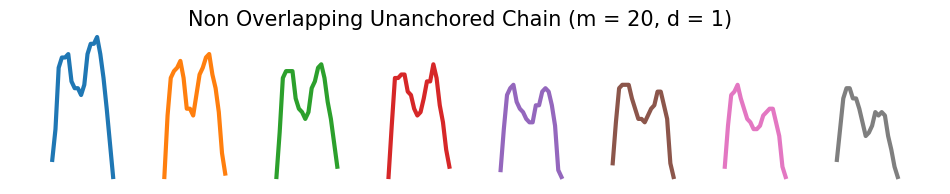

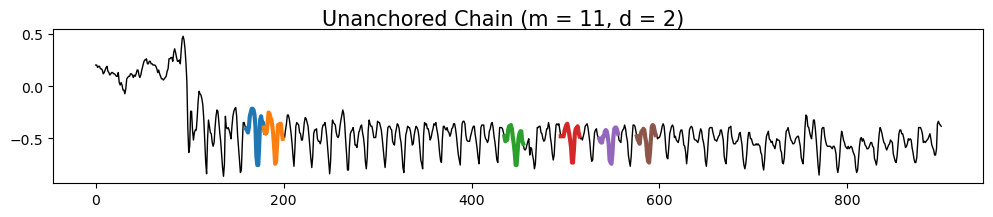

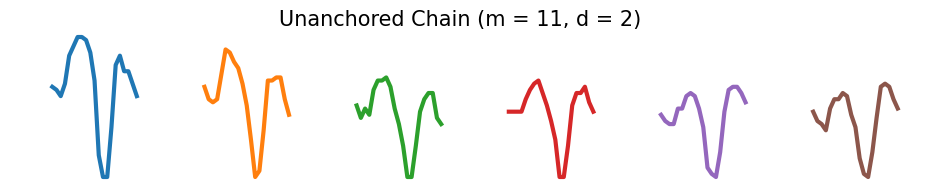

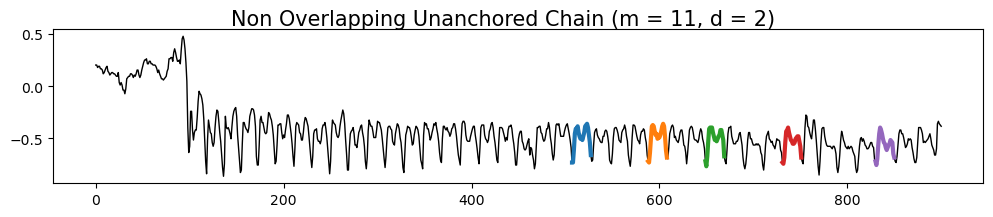

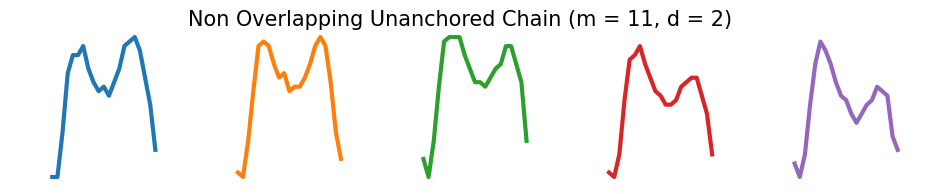

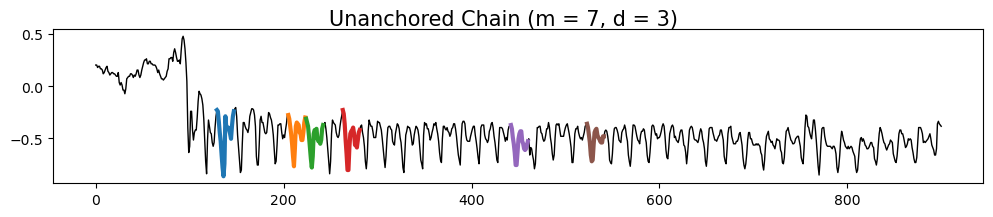

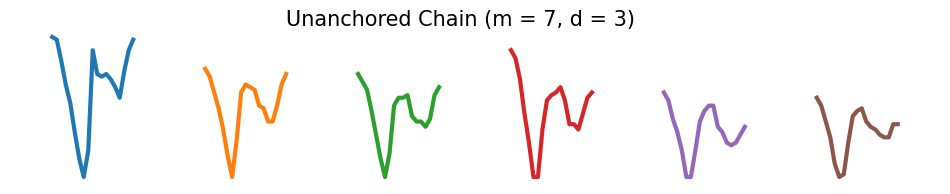

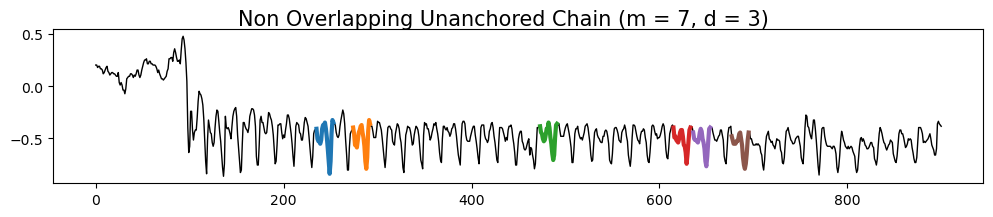

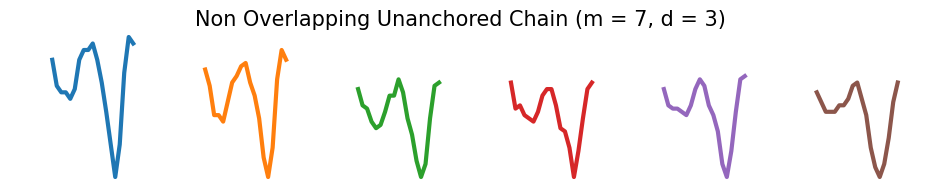

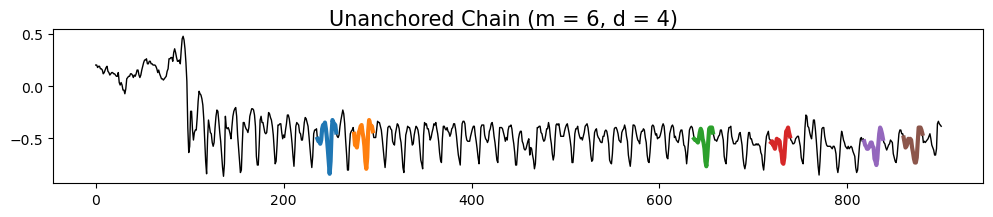

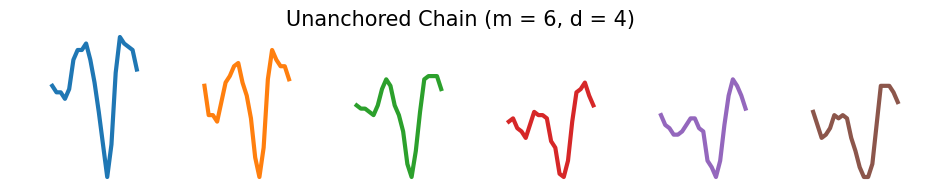

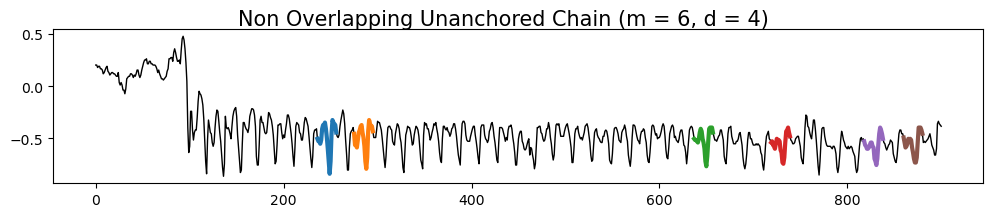

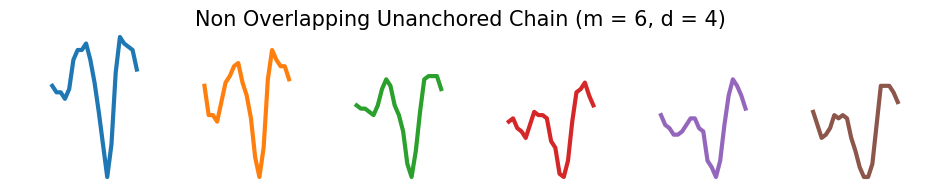

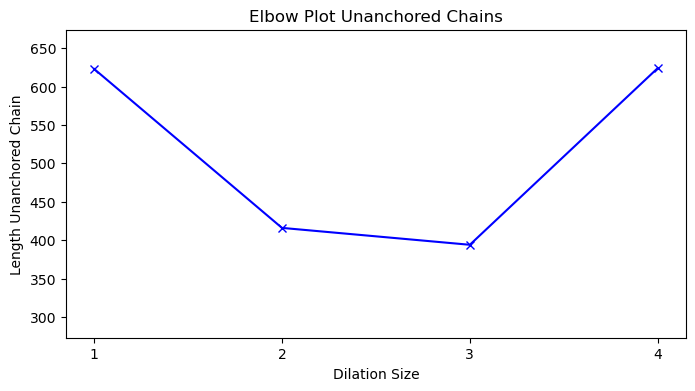

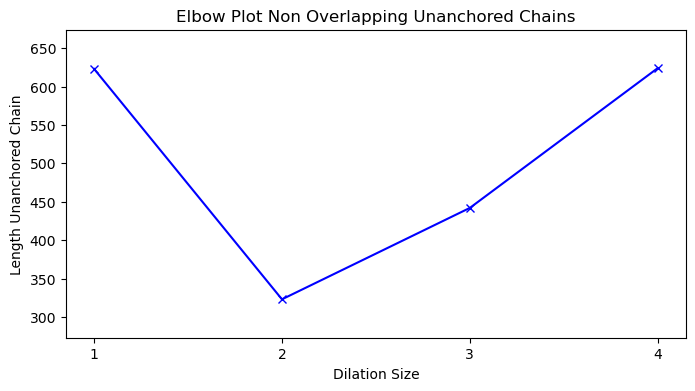

In [5]:
# visualize:
visualize.chains(dilation_sizes, target_w, data_name, use_case)